In [1]:
! pip install transformers

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

c:\Users\suhas\anaconda3\envs\tfgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

Load dataset

In [4]:
fake_data=pd.read_csv(r"C:\Users\suhas\Desktop\Fake News Detection\dataset\Fake\Fake.csv")
real_data=pd.read_csv(r"C:\Users\suhas\Desktop\Fake News Detection\dataset\True\True.csv")

Data Analysis

In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


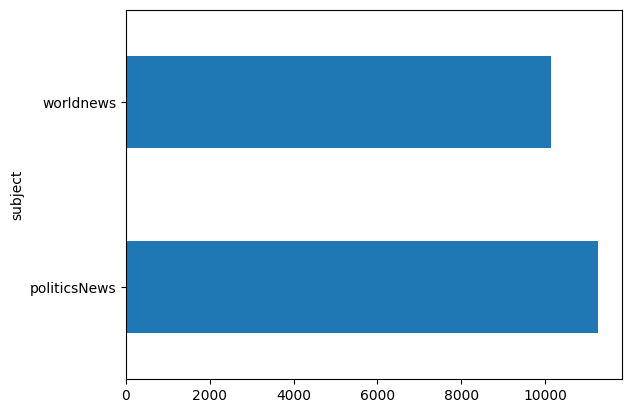

In [7]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5
    

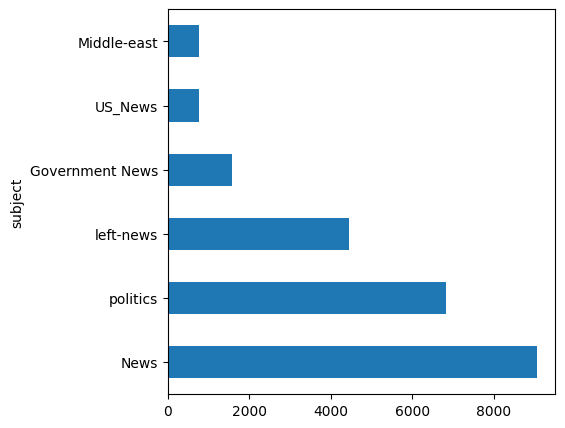

In [8]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

wordcloud real text data

In [10]:
#wordcld_mask=np.array(Image.open("../input/wodcloud-twiter-pic/twitter.png"))


In [11]:
#wordcld_text=" ".join(real_data["text"].tolist())

In [12]:
#wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
#fig=plt.figure(figsize=(8,8))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.tight_layout(pad=0)
#plt.show()

wordcloud fake text data

In [13]:
fake_text=" ".join(fake_data["text"].tolist())

In [14]:
#wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
#fig=plt.figure(figsize=(8,8))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.tight_layout(pad=0)
#plt.show()

In [15]:
fake_data["label"]="fake"
real_data["label"]="real"

In [16]:
final_data= pd.concat([fake_data,real_data])

In [17]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [18]:
final_data.head(10)

,title,text,subject,date,label
0,Trump defends tweets as key to White House vic...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 22, 2017",real
1,Ukraine MPs vote to withdraw law to spur creat...,KIEV (Reuters) - The Ukrainian parliament vote...,worldnews,"December 21, 2017",real
2,U.S. Marshals Service wastes asset forfeiture ...,WASHINGTON (Reuters) - The U.S. Marshals Servi...,politicsNews,"September 12, 2017",real
3,China says confident in economic relations wit...,BEIJING (Reuters) - China has confidence in it...,politicsNews,"November 3, 2017",real
4,BREAKING: FEMALE LAW STUDENT Busts Hillary’s “...,Will this FINALLY be the straw that breaks the...,left-news,"Sep 19, 2016",fake
5,U.S. carrier patrols off Korean peninsula in w...,"ABOARD USS RONALD REAGAN, Sea of Japan (Reuter...",worldnews,"October 19, 2017",real
6,Britain will take a 'hard-headed' approach to ...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,"December 22, 2017",real
7,Putin says Russia will respond in kind if U.S....,"SOCHI, Russia (Reuters) - Russia will respond ...",worldnews,"October 19, 2017",real
8,BREAKING: WIKILEAKS EMAILS SUGGEST Supreme Cou...,Here s what we ve got with the new e-mails and...,left-news,"Oct 13, 2016",fake
9,Turkey has completed purchase of Russian missi...,ISTANBUL (Reuters) - Turkey s purchase of Russ...,worldnews,"November 12, 2017",real


In [19]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [20]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,Trump defends tweets as key to White House vic...,WASHINGTON (Reuters) - U.S. President Donald T...,real
1,Ukraine MPs vote to withdraw law to spur creat...,KIEV (Reuters) - The Ukrainian parliament vote...,real
2,U.S. Marshals Service wastes asset forfeiture ...,WASHINGTON (Reuters) - The U.S. Marshals Servi...,real
3,China says confident in economic relations wit...,BEIJING (Reuters) - China has confidence in it...,real
4,BREAKING: FEMALE LAW STUDENT Busts Hillary’s “...,Will this FINALLY be the straw that breaks the...,fake
...,...,...,...
44893,WATCH: Black Pastors Come On Stage And Endorse...,A Virginia rally for Donald Trump turned into ...,fake
44894,LIBERAL LOSER Screams “This is my America!” Af...,,fake
44895,BREAKING: FORD CEO CITES TRUMP In Announcement...,The Government-Orchestrated Bankruptcies Of G...,fake
44896,Turkish foreign minister says Assad administra...,ISTANBUL (Reuters) - Turkey’s foreign minister...,real


In [21]:
final_data.head()

,title,text,subject,date,label
0,Trump defends tweets as key to White House vic...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 22, 2017",real
1,Ukraine MPs vote to withdraw law to spur creat...,KIEV (Reuters) - The Ukrainian parliament vote...,worldnews,"December 21, 2017",real
2,U.S. Marshals Service wastes asset forfeiture ...,WASHINGTON (Reuters) - The U.S. Marshals Servi...,politicsNews,"September 12, 2017",real
3,China says confident in economic relations wit...,BEIJING (Reuters) - China has confidence in it...,politicsNews,"November 3, 2017",real
4,BREAKING: FEMALE LAW STUDENT Busts Hillary’s “...,Will this FINALLY be the straw that breaks the...,left-news,"Sep 19, 2016",fake


In [22]:
final_data.label.value_counts()

label
fake    23481
real    21417
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

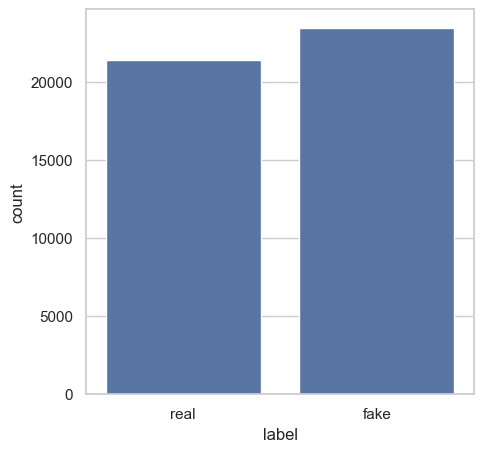

In [23]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [24]:
final_data.head(5)

,title,text,subject,date,label
0,Trump defends tweets as key to White House vic...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 22, 2017",real
1,Ukraine MPs vote to withdraw law to spur creat...,KIEV (Reuters) - The Ukrainian parliament vote...,worldnews,"December 21, 2017",real
2,U.S. Marshals Service wastes asset forfeiture ...,WASHINGTON (Reuters) - The U.S. Marshals Servi...,politicsNews,"September 12, 2017",real
3,China says confident in economic relations wit...,BEIJING (Reuters) - China has confidence in it...,politicsNews,"November 3, 2017",real
4,BREAKING: FEMALE LAW STUDENT Busts Hillary’s “...,Will this FINALLY be the straw that breaks the...,left-news,"Sep 19, 2016",fake


In [25]:
final_data["text"]=final_data["title"]+final_data["text"]

In [26]:
final_data=final_data[["text","label"]]

In [27]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [28]:
final_data.sample(5)

,text,label
38446,Trump Trolls Try KILLING Megyn Kelly’s Book A...,0
4123,Trump Gets TORCHED After Hypocritically Whini...,0
20101,MUSLIM BROTHERHOOD AFFILIATE INVITED To Obama’...,0
17794,Trump and Cuba should start dialogue: Mississi...,1
40629,Trump Makes New Racist Attack On Judge Exposi...,0


In [29]:
final_data.label[9943]

0

In [30]:
final_data.text[36709]

'Sanders says to lay off hundreds of campaign workers: NY TimesWASHINGTON (Reuters) - Democratic presidential candidate Bernie Sanders said on Wednesday he is planning to lay off hundreds of campaign workers nationwide and focus on winning in California, the New York Times reported on Wednesday. Sanders, a U.S. senator from Vermont, told the Times in an interview he planned to remain in the race despite losing four of five states in primary voting on Tuesday, putting him further behind rival Hillary Clinton. (nyti.ms/1N0tb1O) “We want to win as many delegates as we can, so we do not need workers now in states around the country,” the newspaper quoted Sanders as saying.  '

In [31]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [32]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


c:\Users\suhas\anaconda3\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\suhas\anaconda3\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\suhas\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an admini

In [33]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [34]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [36]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [37]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [38]:
maxlen=100

create bert model

In [38]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model
    
    

In [39]:
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 768)          0           tf_bert_model[0][1]          

In [40]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [42]:
history = model.fit(x = {'input_1':X_train_token['input_ids'],'input_2':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

Epoch 1/10


2022-10-01 14:34:04.896548: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-01 14:34:04.907208: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000185000 Hz


958/958 [==============================] - 407s 405ms/step - loss: 0.1422 - accuracy: 0.9382 - val_loss: 0.0050 - val_accuracy: 0.9989
Epoch 2/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 3/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 4/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 5/10
958/958 [==============================] - 385s 401ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 6/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0039 - val_accura

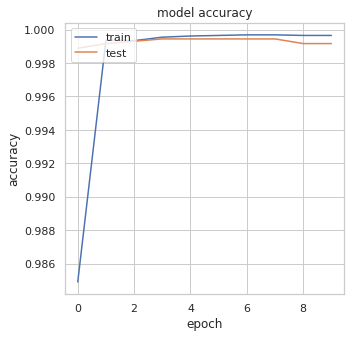

In [43]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

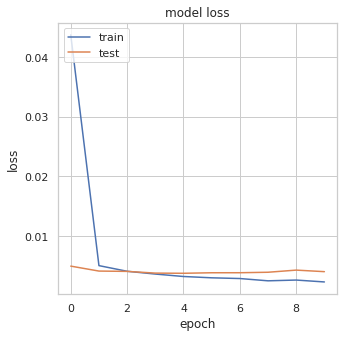

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [45]:
y_pred = np.where(model.predict({ 'input_1' : X_test_token['input_ids'] , 'input_2' : X_test_token['attention_mask']}) >=0.5,1,0)

Confusion matrix

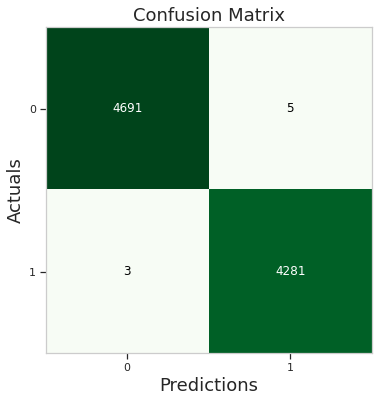

In [46]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [47]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Custom data prediction

In [48]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [49]:
test_token = tokenize(test_text)

In [50]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)

In [51]:
test_text_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [52]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

News is Fake
